<a href="https://colab.research.google.com/github/Tariquzzaman-faisal/hatespeech/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to google drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [3]:
import pandas as pd
csv_path = "/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/bengali_hate_v2.0.csv"
df = pd.read_csv(csv_path)

In [4]:
print(df.head)

<bound method NDFrame.head of                                                    text         label  target
0     বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...      Personal       0
1     এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...     Political       1
2     পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...  Geopolitical       3
3     ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...  Geopolitical       3
4               খানকির পুলা মালায়নদের মেরে সাফা করে ফেল      Personal       0
...                                                 ...           ...     ...
5693  জুতা যতই দামি হোক তার স্থান পায়ে তার স্থান কখ...      Personal       0
5694  আমাদের দেশ ছোট বলে ভারতের চেয়ে পিছিয়ে, না হয়...  Geopolitical       3
5695  হিন্দুদের মধ্যে এগুলো হয় এটাই তার বাস্তব প্রমা...      Personal       0
5696         দেখলে মনে হয় শালী একটা অস্ট্রেলিয়ান গাভী       Personal       0
5697  ভাই আমি আপনার সাথে একমত। আর নারী নেতৃত্বে থাকত...     Political       1

[5698 rows x 3 columns]>


In [5]:
!nvidia-smi
!pip install -qq transformers

Fri Jul 28 06:47:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!pip install numpy
!pip install torch

In [8]:
import torch
import numpy as np
RANDOM_SEED = 101
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [10]:
from transformers import AutoModelForPreTraining, AutoTokenizer

model_name = 'csebuetnlp/banglabert'
bertModel = AutoModelForPreTraining.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [12]:
sample_txt = """
    আমি জানি আমার এই লেখাটির জন্য আমাকে অনেক গালমন্দ শুনতে হবে, তারপরেও লিখছি।
    লিখে খুব কাজ হয় সে রকম উদাহরণ আমার হাতে খুব বেশী নেই কিন্তু অন্তত নিজের ভেতরের ক্ষোভটুকু বের করা
    যায় সেটাই আমার জন্যে অনেক।
"""

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

In [13]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([    2,   857,  1868,   878,   830, 12802,   411,   900,  1258,  1011,
         5288, 12496,  2978,   918,    16, 11437, 16031,   205,  2386,  1103,
         1006,     1,   809,  1971,  5829,   878,  1406,  1103,  3220,  1052,
          925,     3])

In [14]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'আমি',
 'জানি',
 'আমার',
 'এই',
 'লেখাটি',
 '##র',
 'জন্য',
 'আমাকে',
 'অনেক',
 'গাল',
 '##মন্দ',
 'শুনতে',
 'হবে',
 ',',
 'তারপরেও',
 'লিখছি',
 '।',
 'লিখে',
 'খুব',
 'কাজ',
 '[UNK]',
 'সে',
 'রকম',
 'উদাহরণ',
 'আমার',
 'হাতে',
 'খুব',
 'বেশী',
 'নেই',
 'কিন্তু',
 '[SEP]']

# Visualizing the sequence lengths for dataset

In [19]:
!pip install seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-b9a92f402ea8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


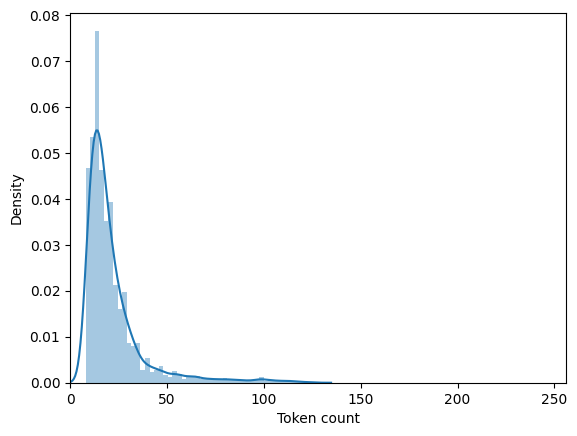

In [20]:
df.dropna(axis=0, how="any", inplace=True)
token_lens = []

for txt in df.text:
  # print(txt)
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');